#Homework 9:
In this assignment, you will be working with many different datasets and using as many tools as you can to create reasonable predictions.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt, ExponentialSmoothing, SimpleExpSmoothing
from datetime import datetime
from sklearn.metrics import mean_squared_error



##Problem 1: Classification

For each graph given, determine (1) whether or not there is a trend and (2) whether there is no seasonality, additive seasonality, or multiplicative seasonality.

*Do not run the following two blocks of code. They are used to embed the image into this file.*

In [ ]:
# DO NOT RUN THIS CODE
# from google.colab import files
# uploaded = files.upload()

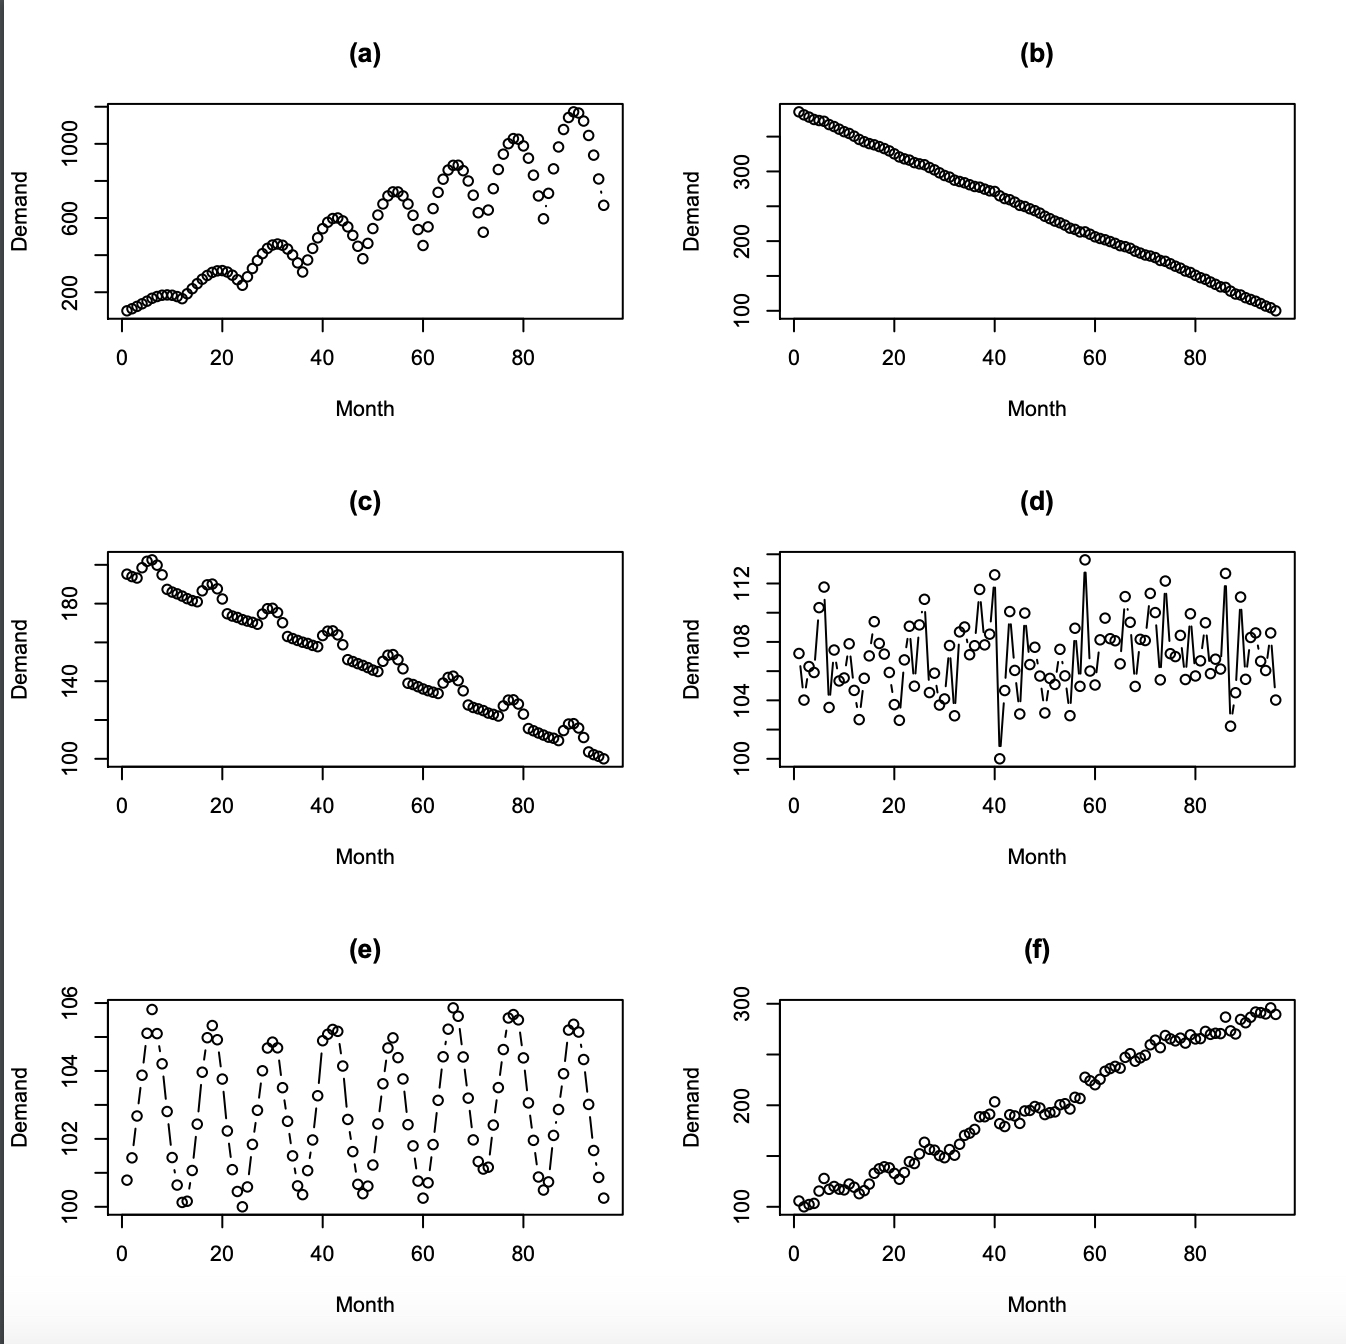

In [1]:
# DO NOT RUN THIS CODE
from IPython.display import Image
Image("Problem 1.JPG", width = 700)

**Answer here.**

a)

b)

c)

d)

e)

f)

##Problem 2: Calculations

The Holt-Winters additive forecasting method was applied to 10 years of quarterly data.

Given:

 $a_{40} = 20$

 $b_{40} = 0.7$
 
 $S_{40} = 0.9$
 
 $S_{39} = 0.4$
 
 $S_{38} = −0.3$
 
 $S_{37} = −0.8$
 
Find the forecasts for the next four quarters.

**Answer here.**

##Problem 3: Simple Exponential Smoothing

Load the auto-sales.csv data into a variable. And then extract on the "AUTOSALE" column into an array.

In [ ]:
# YOUR CODE HERE


Print the date column to see what is weird about the format.

In [ ]:
# YOUR CODE HERE

## our data here looks weird. seems to be the year followed by a decimal representation of the month where .00 = january.

Use pd.date_range to create a useable date range for the rest of this problem.

Documention for this function can be found here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html

We can assume that the dates begin on the first of each month.

In [ ]:
# YOUR CODE HERE
auto_date = pd.date_range(start = '1/1/1970', end = '5/1/1998', freq = 'MS')

Now, combine the AUTOSALE data and the created date range into one dataframe using pd.Series()

In [ ]:
# YOUR CODE HERE


Split the data insto a training set and a test set. Have the first 70% of the data be in the training set. Do not use test_train_split as this will shuffle the rows, which is not what we want for Time Series data.

In [ ]:
# YOUR CODE HERE


Fit a simple exponential model to the training data.

In [ ]:
# YOUR CODE HERE


Plot the entire dataset (training and test data).

Plot the fitted simple exponential model values on top of the training data.

Plot the predicted values on top of the test data.

In [ ]:
# YOUR CODE HERE


##Problem 4: Holt's Linear Exponential

Fit a Holt Linear model onto the auto training data.

In [ ]:
# YOUR CODE HERE


Plot the entire dataset (training and test data).

Plot the fitted simple exponential model values on top of the training data.

Plot the predicted values on top of the test data.

In [ ]:
# YOUR CODE HERE


Now let's try creating some approximate confidence intervals around our predicted values.

We will approximate $\sigma$ using the standard deviation of the fitted values. To account for increasing uncertainty as we forcast further into the future, we will increase our interval at each step by multiplying the base standard deviation, $\sigma$, by $\sqrt{k+1}$ where $k$ is the integer portion of $(h-1)/m$ and where $h$ is the increased step and $m$ is the seasonal period length.

First, find the $\sigma$ value for the training dataset. And the use that to construct a 95% confidence interval for each data point in the test dataset.

In [ ]:
# YOUR CODE HERE


Next, find the forecasted values for the testing data.

In [ ]:
# YOUR CODE HER


Finally, you want to plot the entire dataset, the forecasted values for the test set, and the confidence interval. You can get the confidence interval by adding and subtracting the previous CI values found from the forecasted values.

In [ ]:
# YOUR CODE HERE


Would you say that our model accurately captures the data? If not, why do you think the model falls short?

**Answer here.**

##Problem 5: Holt-Winters Model

This model can incorporate both trend analysis as well as seasonality analysis.

Why is seasonality analysis important, especially when working with sales data?

**Answer here.**

When using the Holt-Winters method through the ExponentialSmoothing() function, you will need to specify the trend and the seasonality: none, 'mul', or 'add'.

Sometimes it will automatically detect the length of periods, but if it cannot, it will throw and error and you will also have to specify that manually. (Usually monthly data has a period of 12.)

Here is further documentation: https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html?highlight=exponential%20smoothing#statsmodels.tsa.holtwinters.ExponentialSmoothing

Create and fit various combinations of trends and seasonalities to determine the best model. (There are 9 possible combinations.)

What is the MSE value of each model? 
Plot the best model's fit as well as forecast along with its confidence intervals against the original data.

In [ ]:
# YOUR CODE HERE


**Answer here.**

MSE Values:

No trend, No seasonality:

Additive trend, No easonality:

Multiplicative trend, No seasonality:

No trend, Additive seasonality:

Additive trend, Additive easonality:

Multiplicative trend, Additive seasonality:

No trend, Multiplicative seasonality:

Additive trend, Multiplicative easonality:

Multiplicative trend, Multiplicative seasonality:

Which model performed the best? Why?

**Answer here.**

What are some possible counfounding variables that make this dataset not perfect?

**Answer here.**

Let's try fitting a log correction to the data instead of inflation
take the natural log of the original data and compute a model using the attributes of your best non-corrected model.

Split this data into 80% train and 20% test.

How does this model compare to the others?



In [ ]:
# YOUR CODE HERE


Use the best trend/seasonality model to fit this data.

In [ ]:
# YOUR CODE HERE


Create the predictions and the 95% confidence interval as you had done for the previous data.

In [ ]:
# YOUR CODE HERE


Plot the data as well as the predictions and 95% confidence interval.

In [ ]:
# YOUR CODE HERE


How does this model compare to the non-corrected best model?

Try changing the split size and compare that model to the one using an 80-20 split.

**Answer here.**

##Problem 6: Gas Prices

Read in and process the gasoline dataset however you see fit.

In [ ]:
gas = pd.read_csv("gasoline-data.csv")
gas_date = [datetime.strptime(date,"%b-%y").date() for date in gas["Date"]]
gas_data = np.array(gas["Data"])


Plot the time series data.

In [ ]:
# YOUR CODE HERE


Is there any apparent trend in the data? How about seasonality?

Try fitting any model(s) you'd like, and get an estimate for the price of gas on July 2014. Use the 1st 100 points as training data.

Plot the original data, your model's fitted data, and your models's predictions with confidence intervals.

Play around and try to create the best model you can! Leave all of your test models in the notebook if you have any. Have fun with it!

In [ ]:
# YOUR CODE HERE

Which model most accurately estimated the value on July 2014?

Which model best predicted the path of the prices leading up
to July 2014?

**Answer here.**

Finally, compute the growth rate from year to year by dividing the price of gas by that of the previous year

Compute any model you'd like on the data, with a training set of the first 100 data points. Get an estimate of the return on July 2014.

How does this model compare to the ones that used price data?

In [ ]:
# YOUR CODE HERE


**Answer here.**

Would you trust the price model or the returns model more?

Why?

**Answer here.**